<h1> MNIST </h1>

MNIST dataset is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “hello world” of Machine Learning: whenever people come up with a new classification algorithm they are curious to see how it will perform on MNIST.

<h2 style="background-color:rgba(100,100,100,0.5);"> Frame the problem </h2>

MNIST digit predictor is clearly a typical supervised learning task, since you are given labeled training examples.

It is also a typical classification task, since you are asked to classify the image for a digit.

Finally, there is no continuous flow of data coming into the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.

<h2 style="background-color:rgba(100,100,100,0.5);"> Fetch and load data </h2>


In [1]:
from sklearn.datasets import fetch_openml

# Fetch the data
# as_Frame=True will fetch data as pandas dataframe
# as_Frame=False will fetch data as array
mnist = fetch_openml('mnist_784', version=1, as_frame=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

<h2 style="background-color:rgba(100,100,100,0.5);"> Analyze the data and its structure </h2>

In [2]:
X, y = mnist["data"], mnist["target"]

# Display shape
print(X.shape)
print(y.shape)

# Display head
print(X.head())
print(y.head())

# Display info
print(X.info())

(70000, 784)
(70000,)
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel78

<h3><b>How many instances are there in the dataset</b></h3>

There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black)

<h3><b>Are there missing values (non-null) for any attributes</b></h3>

>Data cleaning will need to be done to address any missing values

There are no nonnull values, hence no missing features.

<h3><b>What are the numerical and categorical attributes</b></h3>

>Categorical attributes will need to be mapped to numerical values (encoding)

All attributes are numerical, since the image pixels are represented as float, the target is of type string representing the number corresponding to the image it represents in the feature (data) row.

Both the data and target are Python arrays (not pandas dataframes).

<h3><b> Preview the center and dispersion of the features </b></h3>

The features represents the pixels of the images, so they are not expected to be conform to any distribution, it is not ordered numerical data for which center and distribution applies.



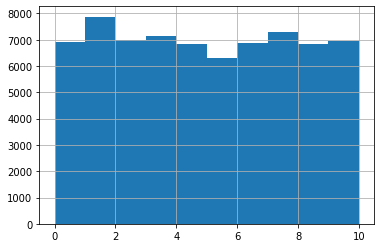

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a pandas series with numbers instead of string
# Most ML algorithms expect numbers, not strings
y = y.astype(np.uint8)
y.hist(bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show()

The histogram plot of the target values indicates a uniform distribution of the values from (0, 9), which shows that all the digits are uniformly represented in the data.

Label: 5


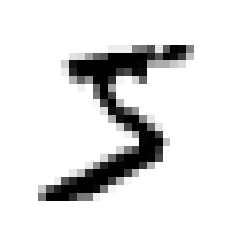

In [4]:
def plot_digit(instance):
    # Reshape from a single array of 784 to (28, 28) pixel 2d array
    image = np.reshape(instance, (28, 28))
    plt.imshow(image, cmap = plt.cm.binary, interpolation="nearest")
    plt.axis("off")

some_digit = X[:1]

plot_digit(some_digit.to_numpy())

# Show corresponding label for the image
# Note that the label for each image is a string
print(f'Label: {y[0]}')

<h2 style="background-color:rgba(100,100,100,0.5);"> Sample the data for testing and training purposes </h2>

The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images).

Also, the training set is already shuffled for us, which is good because this guarantees that all cross-validation folds will be similar (you don’t want one fold to be missing some digits). Moreover, some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row. Shuffling the dataset ensures that this won’t happen.

<AxesSubplot:>

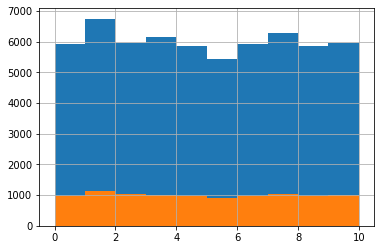

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train.hist(bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_test.hist(bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

The distributions of the test and training data show that they are both uniform.

<h2 style="background-color:rgba(100,100,100,0.5);"> Prepare the Data for Machine Learning Algorithms </h2>

Data cleaning is not required for this data set - there are no missing features. Also, there is no categorical data.

Feature scaling can be useful to improve the performance of the models.

No other custom transformation is needed.

<h3><b> Feature Scaling </b></h2>

One of the most important transformations you need to apply to your data is feature scaling. 

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization. Let's use standardization for feature scaling.

In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),
                                columns=X_train.columns,
                                index=X_train.index)


<h2 style="background-color:rgba(100,100,100,0.5);"> Select and Train Models </h2>

Select a model that you think might work best first. Train and evaluate the performance of this model. The model might fit correctly, underfit or overfit the actual data.

The general approach when a particular model doesn't quite fit perfectly, is to try out many other models from various categories of Machine Learning algorithms (e.g., several Support Vector Machines with different kernels, and possibly a neural network), without spending too much time tweaking the hyperparameters for a particular model.

The goal is to shortlist a few (two to five) promising models.


<h3><b> Training and Evaluating on the Training Set </b></h3>

Select a model to train and evaluate on the data set.

Stochastic Gradient Descent (SGD) classifier is a good place to start (Scikit-Learn’s SGDClassifier class). This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning).

Let’s simplify the problem for now and only try to identify one digit—for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for this classification task:

In [7]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

Let's first use the SGDClassifier.

<h3><b> Predict values for some data inputs </b></h3>

In [8]:
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_scaled, y_train_5)

# Update some_digit to be the scaled value
some_digit = X_train_scaled[:1]

sgd_clf.predict(some_digit)

array([ True])

<h3><b> Measure the performance of the model on the whole training set </b></h3>

Evaluating a classifier is often significantly trickier than evaluating a regressor. There are many performance measures available.

One measure is Accurracy, let's use K-fold cross validation to measure the accurracy.

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train_scaled, y_train_5, cv=3, scoring="accuracy")

array([0.97135, 0.9669 , 0.96795])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.

This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

<h3><b> Confusion Matrix </b></h3>

Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold.

This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).



In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53932,   647],
       [ 1243,  4178]], dtype=int64)

Each row in a confusion matrix represents an actual value, while each column represents a predicted value.

The first row of this matrix considers non-5 images (the negative class): 53,057 of them were correctly classified as non-5s (they are called true negatives), while the remaining 1,522 were wrongly classified as 5s (false positives). The second row considers the images of 5s (the positive class): 1,325 were wrongly classified as non-5s (false negatives), while the remaining 4,096 were correctly classified as 5s (true positives).

A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):

In [11]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

<h3><b> Precision and Recall </b></h3>

<img src="images/precisionrecall.png">

$ Precision = \cfrac{TP}{(TP + FP)} $

$ Recall = \cfrac{TP}{(TP + FN)} $ (also called sensitivity, true positive rate (TPR))

Other terms:

$ FPR = \cfrac{FP}{(FP + TN)} $

$ TNR = \cfrac{TN}{(FP + TN)} $ (also called specificity)

In [12]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred)) # == 4096 / (4096 + 1522)
print(recall_score(y_train_5, y_train_pred)) # == 4096 / (4096 + 1325)

0.8659067357512953
0.770706511713706


<h3><b> F1 score </b></h3>

<div style="background-color:white;color:black">

$ F_1 = 
\cfrac{2}{\cfrac{1}{precision} + \cfrac{1}{recall}} = 
2 \times \cfrac{precision \times recall}{precision + recall} = 
\cfrac{TP}{TP + \cfrac{FN + FP}{2}}
 $

</div>

In [13]:
from sklearn.metrics import f1_score

print(f1_score(y_train_5, y_train_pred))

0.8155377708373999


The F1 score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall.

For example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up in your product (in such cases, you may even want to add a human pipeline to check the classifier’s video selection).

On the other hand, suppose you train a classifier to detect shoplifters in surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the <b><i>precision/recall trade-off</i></b>.

<h3><b> Precision/Recall Trade-off </b></h3>

To understand this trade-off, let’s look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function. If that score is greater than a threshold, it assigns the instance to the positive class; otherwise it assigns it to the negative class. 

The following figure shows a few digits positioned from the lowest score on the left to the highest score on the right. Suppose the decision threshold is positioned at the central arrow (between the two 5s): you will find 4 true positives (actual 5s) on the right of that threshold, and 1 false positive (actually a 6). Therefore, with that threshold, the precision is 80% (4 out of 5). But out of 6 actual 5s, the classifier only detects 4, so the recall is 67% (4 out of 6). If you raise the threshold (move it to the arrow on the right), the false positive (the 6) becomes a true negative, thereby increasing the precision (up to 100% in this case), but one true positive becomes a false negative, decreasing recall down to 50%. 

Conversely, lowering the threshold increases recall and reduces precision.

<img src="images/decisionthreshold.png">

Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a score for each instance, and then use any threshold you want to make predictions based on those scores:


In [14]:
y_scores = sgd_clf.decision_function(some_digit)
print(y_scores)

threshold = 0

y_some_digit__pred = (y_scores > threshold)
print(y_some_digit__pred)

# SGDClassifier uses a threshold value of 0, so the previous code 
# returns the same result as the predict method.
# Let us raise the threshold:

threshold = 8000
y_some_digit__pred = (y_scores > threshold)
print(y_some_digit__pred)

[0.38453618]
[ True]
[False]


This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 8,000.

How do you decide which threshold to use?

First, use the cross_val_predict() function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions. Then use the precision_recall_curve() function to compute precision and recall for all possible thresholds. Finally, plot the precision and recall as functions of the threshold value.

<h3><b> Precision-Recall (PR) Curve </b></h3>

The plots of precision and recall for different threshold values is called the PR curve.

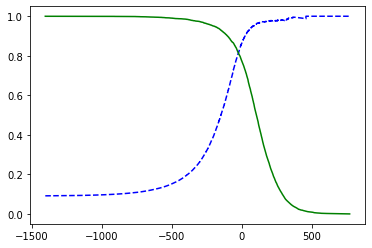

In [15]:
y_scores = cross_val_predict(sgd_clf, X_train_scaled, y_train_5, cv=3,
                             method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

You may wonder why the precision curve is bumpier than the recall curve.

The reason is that precision may sometimes go down when you raise the threshold (although in general it will go up). To understand why, look back at decision threshold figure and notice what happens when you start from the central threshold and move it just one digit to the right: precision goes from 4/5 (80%) down to 3/4 (75%). On the other hand, recall can only go down when the threshold is increased, which explains why its curve looks smooth.

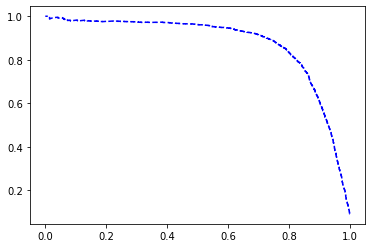

In [16]:
plt.plot(recalls, precisions, "b--",)
plt.show()

You can see that precision really starts to fall sharply around 80% recall. You will probably want to select a precision/recall trade-off just before that drop—for example, at around 60% recall. But of course, the choice depends on your project.

Suppose you decide to aim for 90% precision. You look up the first plot and find that you need to use a threshold of about 8,000.

To be more precise you can search for the lowest threshold that gives you at least 90% precision (np.argmax() will give you the first index of the maximum value, which in this case means the first True value). To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can use the threshold with the scores:

In [17]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # ~7816

y_train_pred_90 = (y_scores >= threshold_90_precision)

print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9001599268905643
0.7268031728463383


Great, you have a 90% precision classifier! As you can see, it is fairly easy to create a classifier with virtually any precision you want: just set a high enough threshold, and you’re done. But wait, not so fast. A high-precision classifier is not very useful if its recall is too low!

If someone says, “Let’s reach 99% precision,” you should ask, “At what recall?”

<h3><b> ROC Curve </b></h3>

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.

It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate (FPR). The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to 1 – the true negative rate (TNR), which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity.

Hence, the ROC curve plots sensitivity (recall) versus 1 – specificity.

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

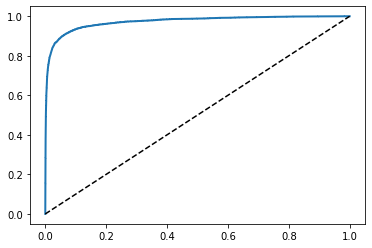

In [19]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid

plot_roc_curve(fpr, tpr)
plt.show()

Once again there is a trade-off: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC:

In [20]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_train_5, y_scores))

0.972311374566254


<h3><b> ROC vs PR Curve </b></h3>

Since the ROC curve is so similar to the precision/recall (PR) curve, you may wonder how to decide which one to use.

As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives. Otherwise, use the ROC curve.

For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the top-right corner).

<h3><b> Try other models and measure scores </b></h3>

Let’s now train a RandomForestClassifier and compare its ROC curve and ROC AUC score to those of the SGDClassifier. First, you need to get scores for each instance in the training set. But due to the way it works, the RandomForestClassifier class does not have a decision_function() method. Instead, it has a predict_proba() method.

Scikit-Learn classifiers generally have one or the other, or both. The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5):

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train_scaled, y_train_5, cv=3,
                                    method="predict_proba")

# The roc_curve() function expects labels and scores, but instead of scores 
# you can give it class probabilities. 
# Let’s use the positive class’s probability as the score:
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

Now you are ready to plot the ROC curve. It is useful to plot the first ROC curve as well to see how they compare.

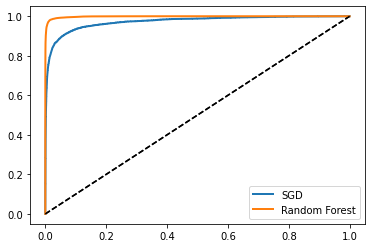

In [22]:
plot_roc_curve(fpr, tpr, "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [23]:
print(roc_auc_score(y_train_5, y_scores_forest))

y_train_pred_50_forest = (y_scores_forest >= .5)

print(precision_score(y_train_5, y_train_pred_50_forest))
print(recall_score(y_train_5, y_train_pred_50_forest))

0.9983414120257013
0.9897468089558485
0.8725327430363402


The ROC AUC score is significantly better, and so are the precision and recall scores.

Here, we're using a threshold of .5 which is also the default. This corresponds to saying that getting a 5 vs not getting a 5 is 50% probable. So, if the probability score is greater than .5, we're accepting it as a 5 and if it is less than .5, we're accepting it as something other than a 5. We can change this threshold value and evaluate what scores we get for the precision and recall.

You now know how to train binary classifiers, choose the appropriate metric for your task, evaluate your classifiers using cross-validation, select the precision/recall trade-off that fits your needs, and use ROC curves and ROC AUC scores to compare various models. Now let’s try to detect more than just the 5s.

<h2 style="background-color:rgba(100,100,100,0.5);"> Fine-Tune Your Model </h2>

After shortlisting some promising models, you need to fine-tune the models.

Grid Search
One option would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.

Instead, you should get Scikit-Learn’s GridSearchCV to search for you. All you need to do is tell it which hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values.

For example, the following code searches for the best combination of hyperparameter values for the RandomForestRegressor for the 5's classifier.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt', 'log2']},
]

grid_search = GridSearchCV(forest_clf, param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train_5)

print(grid_search.best_params_)

{'max_features': 'auto', 'n_estimators': 500}


<h2 style="background-color:rgba(100,100,100,0.5);"> Analyze the Best Models and Their Errors </h2>

You will often gain good insights on the problem by inspecting the best models.

First, look at the confusion matrix. You need to make predictions using the cross_val_predict() function, then call the confusion_matrix() function (for the default threshold value):

In [25]:
final_model =  grid_search.best_estimator_

y_train_pred = cross_val_predict(final_model, X_train_scaled, y_train_5, cv=3)
conf_mx = confusion_matrix(y_train_5, y_train_pred)

print(conf_mx)

[[54530    49]
 [  697  4724]]


It’s often more convenient to look at an image representation of the confusion matrix, using Matplotlib’s matshow() function:

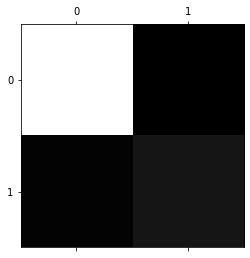

In [26]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

A good confusiong matrix will have most images on the main diagonal which means that they were classified correctly. The 5s look darker than the not 5s, which could mean that there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as on other digits. In fact, you can verify that both are the case.

Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute numbers of errors (which would make abundant classes look unfairly bad), then fill the diagonal with zeros to keep only the errors, and plot the result.

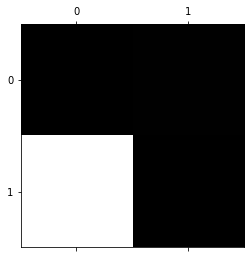

In [27]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

plt.show()

The rows represent actual classes, while columns represent predicted classes. It looks like the classifier misses a lot of 5s (false 5s).

Analyzing the confusion matrix often gives you insights into ways to improve your classifier. Looking at this plot, it seems that your efforts should be spent on reducing the false 5s. For example, you could try to gather more training data for digits that look like 5s (but are not) so that the classifier can learn to distinguish them from real 5s. Or you could engineer new features that would help the classifier—for example, writing an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5 has none). Or you could preprocess the images (e.g., using Scikit-Image, Pillow, or OpenCV) to make some patterns, such as closed loops, stand out more.

Analyzing individual errors can also be a good way to gain insights on what your classifier is doing and why it is failing, but it is more difficult and time-consuming. For example, let’s plot examples of 3s and 5s (the plot_digits() function just uses Matplotlib’s imshow() function; see this chapter’s Jupyter notebook for details):

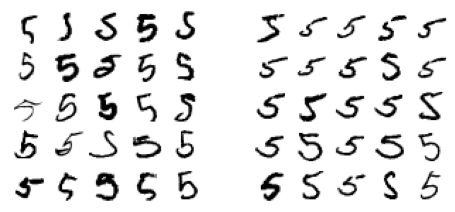

In [28]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [np.reshape(instance, (size,size)) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

cl_a, cl_b = False, True
X_ba = X_train[(y_train_5 == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train_5 == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(223); plot_digits(X_ba[:25].to_numpy(), images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25].to_numpy(), images_per_row=5)
plt.show()

The 5 × 5 block on the left show digits mis-classified as 5s, and the 5 × 5 block on the right show images classified as 5s. Some of the digits that the classifier gets wrong (i.e., in the left block) are so badly written that even a human would have trouble classifying them (e.g., the 5 in the first row and second column truly looks like a badly written 3). However, most misclassified images seem like obvious errors to us, and it’s hard to understand why the classifier made the mistakes it did.

The main difference between 3s and 5s is the position of the small line that joins the top line to the bottom arc. If you draw a 3 with the junction slightly shifted to the left, the classifier might classify it as a 5, and vice versa. In other words, the classifier is quite sensitive to image shifting and rotation. So one way to reduce the 3/5 confusion would be to preprocess the images to ensure that they are well centered and not too rotated. This will probably help reduce other errors as well.

<h2 style="background-color:rgba(100,100,100,0.5);"> Multiclass Classification </h2>

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.

Some algorithms (such as Logistic Regression classifiers, Random Forest classifiers, and naive Bayes classifiers) are capable of handling multiple classes natively. Others (such as SGD Classifiers or Support Vector Machine classifiers) are strictly binary classifiers. However, there are various strategies that you can use to perform multiclass classification with multiple binary classifiers.

<h3><b> One v Rest (OvR) </b></h3>

One way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the one-versus-the-rest (OvR) strategy (also called one-versus-all).

<h3><b> One v One (OvO) </b></h3>

Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one (OvO) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45 binary classifiers! When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

Some algorithms (such as Support Vector Machine classifiers) scale poorly with the size of the training set. For these algorithms OvO is preferred because it is faster to train many classifiers on small training sets than to train few classifiers on large training sets. For most binary classification algorithms, however, OvR is preferred.

<h3><b> Training and Evaluating on the Training Set </b></h3>

Select a model to train and evaluate on the data set.

Let’s use the Support Vector Machine to train and predict.

We can use the original target classes from 0 to 9 (y_train), instead of the 5-versus-the-rest target classes (y_train_5) since we are now training for multiclass classification.

In [29]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train) # y_train, not y_train_5

SVC()

<h3><b> Predict values for some data inputs </b></h3>


In [30]:
print(svm_clf.predict(some_digit))

[5]


This code trains the SVC on the training set using the original target classes from 0 to 9 (y_train), instead of the 5-versus-the-rest target classes (y_train_5). Then it makes a prediction (a correct one in this case).

Under the hood, Scikit-Learn actually used the OvO strategy: it trained 45 binary classifiers, got their decision scores for the image, and selected the class that won the most duels.

The decision_function() method returns 10 scores per instance (instead of just 1). That’s one score per class (it’s the number of won duels plus or minus a small tweak to break ties, based on the binary classifier scores):

In [31]:
some_digit_scores = svm_clf.decision_function(some_digit)
print(some_digit_scores)

[[ 2.75523198  0.72151155  7.18864415  8.30206541 -0.30060064  9.3051746
   1.72946953  5.03043793  3.8171665   6.13068855]]


The highest score is indeed the one corresponding to class 5:

In [32]:
print(np.argmax(some_digit_scores))

# When a classifier is trained, it stores the list of target classes in its classes_ attribute,
# ordered by value. In this case, the index of each class in the classes_ array conveniently
# matches the class itself (e.g., the class at index 5 happens to be class 5), 
# but in general you won’t be so lucky.
print(svm_clf.classes_)
print(svm_clf.classes_[5])

5
[0 1 2 3 4 5 6 7 8 9]
5


<h3><b> Measure the performance of the model on the whole training set </b></h3>

In [ ]:
# The performance can be measured using cross_val_score, but this takes a long time to execute
# for the SVM classifier, so this is commented out:
# print(cross_val_score(svm_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))

<h3><b> Try other models and measure scores </b></h3>

The SGDClassifier uses the OvR under the hood for multiclass classification.

In this example, since there are 10 classes, it will train 10 binary classifiers. The decision_function() will return one value per class.

In [ ]:
sgd_clf.fit(X_train_scaled, y_train)

print(sgd_clf.predict(some_digit))
print(sgd_clf.decision_function(some_digit))

print(cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))

If you want to force Scikit-Learn to use one-versus-one or one-versus-the-rest, you can use the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance and pass a classifier to its constructor (it does not even have to be a binary classifier). For example, this code creates a multiclass classifier using the OvR strategy, based on an SVC:

In [34]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train_scaled, y_train)
print(ovr_clf.predict(some_digit))

<h3><b> Fine-Tune Your Model </b></h3>

Let' assume that you have identified the most promising models and use Grid Search to fine-tune the models.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'average': [True, False],
              'l1_ratio': np.linspace(0, 1, num=10),
              'alpha': np.power(10, np.arange(-4, 1, dtype=float))}

grid_search = GridSearchCV(sgd_clf, param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

print(grid_search.best_params_)

<h3><b> Analyze the Best Models and Their Errors </b></h3>

You will often gain good insights on the problem by inspecting the best models.

First, look at the confusion matrix. You need to make predictions using the cross_val_predict() function, then call the confusion_matrix() function, just like you did earlier:

In [45]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

print(conf_mx)

C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


[[5583    0   24    5    9   52   37    6  206    1]
 [   0 6401   37   24    4   46    4    7  206   13]
 [  28   29 5252   90   72   27   66   40  344   10]
 [  24   18  120 5221    2  221   27   39  389   70]
 [  12   14   48   11 5203   13   35   25  310  171]
 [  27   16   30  170   53 4490   76   15  482   62]
 [  29   15   47    2   43   98 5559    4  120    1]
 [  21   10   53   30   52   13    3 5703  167  213]
 [  18   64   48   86    3  135   28   11 5413   45]
 [  24   18   31   64  119   39    1  181  322 5150]]


C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


It’s often more convenient to look at an image representation of the confusion matrix, using Matplotlib’s matshow() function:

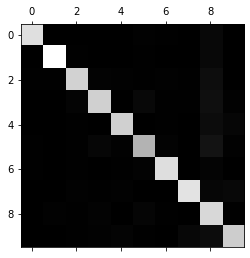

In [46]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

This confusion matrix looks pretty good, since most images are on the main diagonal, which means that they were classified correctly. The 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as on other digits. In fact, you can verify that both are the case.

Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute numbers of errors (which would make abundant classes look unfairly bad), fill the diagonal with zeros to keep only the errors, and plot the result:

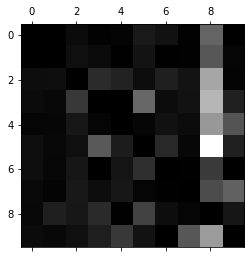

In [47]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

plt.show()

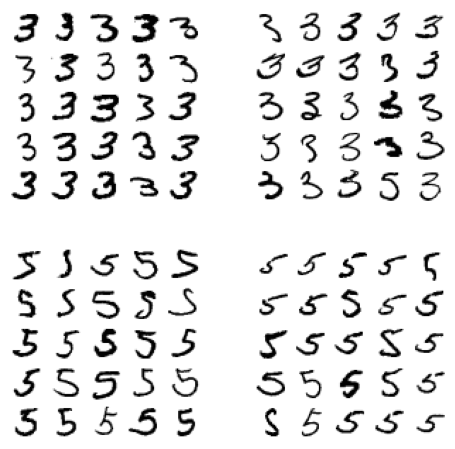

In [48]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25].to_numpy(), images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25].to_numpy(), images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25].to_numpy(), images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25].to_numpy(), images_per_row=5)
plt.show()

The two 5 × 5 blocks on the left show digits classified as 3s, and the two 5 × 5 blocks on the right show images classified as 5s. Some of the digits that the classifier gets wrong (i.e., in the bottom-left and top-right blocks) are so badly written that even a human would have trouble classifying them (e.g., the 5 in the first row and second column truly looks like a badly written 3). However, most misclassified images seem like obvious errors to us, and it’s hard to understand why the classifier made the mistakes it did. The reason is that we used a simple SGDClassifier, which is a linear model. All it does is assign a weight per class to each pixel, and when it sees a new image it just sums up the weighted pixel intensities to get a score for each class. So since 3s and 5s differ only by a few pixels, this model will easily confuse them.

The main difference between 3s and 5s is the position of the small line that joins the top line to the bottom arc. If you draw a 3 with the junction slightly shifted to the left, the classifier might classify it as a 5, and vice versa. In other words, this classifier is quite sensitive to image shifting and rotation. So one way to reduce the 3/5 confusion would be to preprocess the images to ensure that they are well centered and not too rotated. This will probably help reduce other errors as well.

<h2 style="background-color:rgba(100,100,100,0.5);"> Multilabel Classification </h2>

Think of label as a category, and each category can have binary or multiple classes. In this example, so far, we have categorized the features by digit, first considering the binary case (5 vs non 5s), then the multiple class case.

But, the same data could possibly be associated with multiple categories. For example, another category could be whether the number is odd/even - this category is a binary classifier. Similarly, you can choose to view the data in the perspective of different categories with each category having binary or multiple classes.

Multiclass classifier - denotes a single category with multiple classes - each row of data is associated with a single category and representing a class within that category.

Multilabel classifier - denotes multiple categories - each row of data is associated with multiple categories, and each category having a binary class.

Note that the multilabel classifier is a generalization of of a classifier with multiple category (label) where each label can have multiple classes - this multilabel and multiclass classifier is called Multioutput classifier.

Another example of multilabel classifier is a face-recognition classifier: what should it do if it recognizes several people in the same picture? It should attach one tag per person it recognizes. Say the classifier has been trained to recognize three faces, Alice, Bob, and Charlie. Then when the classifier is shown a picture of Alice and Charlie, it should output [1, 0, 1] (meaning “Alice yes, Bob no, Charlie yes”).

Therefore, a multilabel classifier predicts multiple binary tags as the output.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# First category (label): whether number is large vs small
y_train_large = (y_train >= 7)

# Second category (label): whether the number is odd vs even
y_train_odd = (y_train % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

This code creates a y_multilabel array containing two target labels for each digit image: the first indicates whether or not the digit is large (7, 8, or 9), and the second indicates whether or not it is odd. The KNeighborsClassifier supports multilabel classification, though not all classifiers do. We train it using the multiple targets array and then make a prediction, note that it outputs two labels:

In [51]:
knn_clf.predict(some_digit)

array([[False,  True]])

And it gets it right! The digit 5 is indeed not large (False) and odd (True).

There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on your project. One approach is to measure the F1 score for each individual label (or any other binary classifier metric discussed earlier), then simply compute the average score. This code computes the average F1 score across all labels:

In [52]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

print(f1_score(y_multilabel, y_train_knn_pred, average="macro"))

0.976410265560605


This assumes that all labels are equally important, however, which may not be the case. In particular, if you have many more pictures of Alice than of Bob or Charlie, you may want to give more weight to the classifier’s score on pictures of Alice. One simple option is to give each label a weight equal to its support (i.e., the number of instances with that target label). To do this, simply set average="weighted" in the preceding code.

<h2 style="background-color:rgba(100,100,100,0.5);"> Multioutput Classification </h2>

The last type of classification task we are going to discuss here is called multioutput–multiclass classification (or simply multioutput classification). It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.

Note: The line between classification and regression is sometimes blurry, such as in this example. Arguably, predicting pixel intensity is more akin to regression than to classification. Moreover, multioutput systems are not limited to classification tasks; you could even have a system that outputs multiple labels per instance, including both class labels and value labels.

In [60]:
# This example converts all dataframes to numpy arrays
# then adds noise
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train.to_numpy() + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test.to_numpy() + noise

y_train_mod = X_train.to_numpy()
y_test_mod = X_test.to_numpy()

Let's train the classifier and make it predict the clean image for an input noisy image:

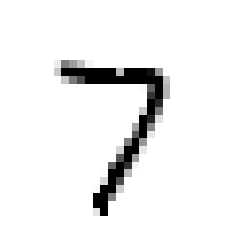

In [62]:
knn_clf.fit(X_train_mod, y_train_mod)

some_index = 0
clean_digit = knn_clf.predict([X_test_mod[some_index]])

plot_digit(clean_digit)

<h2 style="background-color:rgba(100,100,100,0.5);"> Summary </h2>

This exercise demonstrates how to do build a classification model - select good metrics for classification tasks, pick the appropriate precision/recall trade-off, compare classifiers, and more generally build good classification systems for a variety of tasks.